## Gender Classification

The following example shows how NLTK uses features for gender classification of names.

In [1]:
import nltk
from nltk.corpus import names

In [2]:
m = names.words('male.txt')
len(m)

2943

In [3]:
f = names.words('female.txt')
len(f)

5001

### Creation of a training set and a test set

In [4]:
import random
random.seed(1234) # It is useful to set the seed to allow replicability
names = ([(name,'male') for name in m] +
         [(name,'female') for name in f])
random.shuffle(names)
train_names, test_names = names[500:], names[:500]
print("Size of training set:", len(train_names))
print(train_names[:3])
print("Size of test set:", len(test_names))
print(test_names[:3])

Size of training set: 7444
[('Ranice', 'female'), ('Faunie', 'female'), ('Holly-Anne', 'female')]
Size of test set: 500
[('Butler', 'male'), ('Umberto', 'male'), ('Aloysius', 'male')]


In [5]:
def ratio_gender(data,gender):
    genders = [g for (n,g) in data if g == gender]
    return len(genders)/len(data)
print("Train data")
print("Males: %1.3f Females: %1.3f" % (ratio_gender(train_names,'male'),
                                       ratio_gender(train_names,'female')))
print("Test data")
print("Males: %1.3f Females: %1.3f" % (ratio_gender(test_names,'male'),
                                       ratio_gender(test_names,'female')))

Train data
Males: 0.368 Females: 0.632
Test data
Males: 0.400 Females: 0.600


### Extraction of features

In [6]:
def gender_features(word):
   return {'last_letter': word[-1]}

In [7]:
gender_features('John')

{'last_letter': 'n'}

In [8]:
gender_features('Mary')

{'last_letter': 'y'}

In [9]:
train_set = [(gender_features(n),g) for (n,g) in train_names]
test_set = [(gender_features(n),g) for (n,g) in test_names]

### Training a classifier

In [10]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

### Testing the classifier

In [11]:
classifier.classify(gender_features('Neo'))

'male'

In [12]:
classifier.classify(gender_features('Trinity'))

'female'

In [13]:
nltk.classify.accuracy(classifier,test_set)

0.776

### Error analysis

In [14]:
train_names = names[1500:]
devtest_names = names[500:1500]
test_names = names[:500]
train_set = [(gender_features(n),g) for (n,g) in train_names]
devtest_set = [(gender_features(n),g) for (n,g) in devtest_names]
test_set = [(gender_features(n),g) for (n,g) in test_names]
print("Accuracy of dev-test set:", nltk.classify.accuracy(classifier,devtest_set))
errors = []
for (name,tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append((tag,guess,name))
print("Number of errors:",len(errors))

Accuracy of dev-test set: 0.752
Number of errors: 248


In [15]:
for (tag,guess,name) in sorted(errors)[:5]:
    print("correct=%-8s guess=%-8s name=%-30s" % (tag,guess,name))

correct=female   guess=male     name=Adrien                        
correct=female   guess=male     name=Aigneis                       
correct=female   guess=male     name=Aileen                        
correct=female   guess=male     name=Alisun                        
correct=female   guess=male     name=Alys                          


## A revised gender classifier

In [22]:
def gender_features2(word):
       return {'suffix1': word[-1:],
               'suffix2': word[-2:]}
train_set2=[(gender_features2(n),g) for (n,g) in train_names]
devtest_set2=[(gender_features2(n),g) for (n,g) in devtest_names]
classifier2=nltk.NaiveBayesClassifier.train(train_set2)
nltk.classify.accuracy(classifier2,devtest_set2)

0.77

## Overfitting

In [23]:
def gender_features3(name):
      features = {}
      features['firstletter'] = name[0].lower()
      features['lastletter'] = name[-1]
      for letter in 'abcdefghijklmnopqrstuvwxyz':
         features['count(%s)' % letter] = name.lower().count(letter)
         features['has(%s)' % letter] = (letter in name.lower())
      return features

gender_features3('John')

{'count(a)': 0,
 'count(b)': 0,
 'count(c)': 0,
 'count(d)': 0,
 'count(e)': 0,
 'count(f)': 0,
 'count(g)': 0,
 'count(h)': 1,
 'count(i)': 0,
 'count(j)': 1,
 'count(k)': 0,
 'count(l)': 0,
 'count(m)': 0,
 'count(n)': 1,
 'count(o)': 1,
 'count(p)': 0,
 'count(q)': 0,
 'count(r)': 0,
 'count(s)': 0,
 'count(t)': 0,
 'count(u)': 0,
 'count(v)': 0,
 'count(w)': 0,
 'count(x)': 0,
 'count(y)': 0,
 'count(z)': 0,
 'firstletter': 'j',
 'has(a)': False,
 'has(b)': False,
 'has(c)': False,
 'has(d)': False,
 'has(e)': False,
 'has(f)': False,
 'has(g)': False,
 'has(h)': True,
 'has(i)': False,
 'has(j)': True,
 'has(k)': False,
 'has(l)': False,
 'has(m)': False,
 'has(n)': True,
 'has(o)': True,
 'has(p)': False,
 'has(q)': False,
 'has(r)': False,
 'has(s)': False,
 'has(t)': False,
 'has(u)': False,
 'has(v)': False,
 'has(w)': False,
 'has(x)': False,
 'has(y)': False,
 'has(z)': False,
 'lastletter': 'n'}

In [34]:
train_set3 = [(gender_features3(n),g) for (n,g) in train_names]
devtest_set3 = [(gender_features3(n),g) for (n,g) in devtest_names]
classifier3 = nltk.NaiveBayesClassifier.train(train_set3[:50]) # small training set
nltk.classify.accuracy(classifier3,devtest_set3)

0.698

In [32]:
classifier2b = nltk.NaiveBayesClassifier.train(train_set2[:50]) # small training set
nltk.classify.accuracy(classifier2b,devtest_set2)

0.7

In [36]:
nltk.classify.accuracy(classifier3,train_set3[:50])

0.88

In [37]:
nltk.classify.accuracy(classifier2b,devtest_set2[:50])

0.72

In [47]:
train_accuracy2 = []
devtest_accuracy2 = []
train_accuracy3 = []
devtest_accuracy3 = []
nsamples = range(10,100,10)
for n in nsamples:
    classifier2c = nltk.NaiveBayesClassifier.train(train_set3[:n])
    train_accuracy2.append(nltk.classify.accuracy(classifier2c,train_set2[:n]))
    devtest_accuracy2.append(nltk.classify.accuracy(classifier2c,devtest_set2))
    classifier3c = nltk.NaiveBayesClassifier.train(train_set3[:n])
    train_accuracy3.append(nltk.classify.accuracy(classifier3c,train_set3[:n]))
    devtest_accuracy3.append(nltk.classify.accuracy(classifier3c,devtest_set3))

### This plot shows that there is no overfitting

In this plot there is not much difference between the evaluation of the training set and the test set, except for a very small training size.

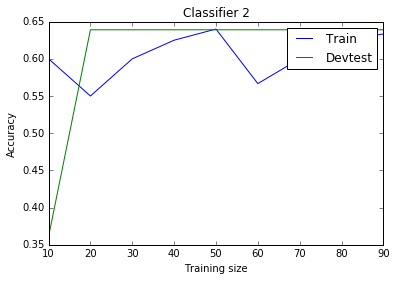

In [50]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(nsamples,train_accuracy2,label='Train')
plt.plot(nsamples,devtest_accuracy2,label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 2')
plt.legend()

### This plot shows that there is overfitting

We can observe overfitting when the evaluation on the training set is much better than that on the test set. Overfitting is generally lesser as we increase the size of the training set.

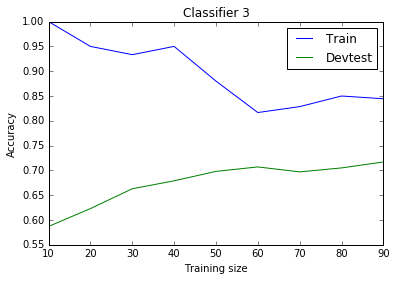

In [51]:
plt.plot(nsamples,train_accuracy3,label='Train')
plt.plot(nsamples,devtest_accuracy3,label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 3')
plt.legend()

## Gender classifier in Scikit-learn

In [53]:
from sklearn.naive_bayes import MultinomialNB
def gender_features(word):
    "Return the ASCII value of the last two characters"
    return [ord(word[-2]),ord(word[-1])]
train_set = [(gender_features(n),g) for (n,g) in train_names]
devtest_set = [(gender_features(n),g) for (n,g) in devtest_names]
test_set = [(gender_features(n),g) for (n,g) in test_names]
train_X,train_y = zip(*train_set)
classifier = MultinomialNB()
classifier.fit(train_X,train_y)
devtest_X,devtest_y = zip(*test_set)
classifier.predict(devtest_X[:5])

array(['female', 'female', 'female', 'female', 'female'], 
      dtype='<U6')

In [54]:
from sklearn.metrics import accuracy_score
devtest_predictions = classifier.predict(devtest_X)
accuracy_score(devtest_y,devtest_predictions)

0.61399999999999999

## PCA in sklearn

In [1]:
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
files = glob.glob('python/enron1/ham/*.txt')
tfidf = TfidfVectorizer(input='filename',
                        stop_words='english')
tfidf_values = tfidf.fit_transform(files)
tfidf_values.shape

(3672, 19892)

The above code creates a sparse matrix and stores it in `tfidf_values`. Sklearn's PCA does not handle sparse matrices. Instead of converting `tfidf_values` to a dense matrix, we will use TruncatedSVD, which is an estimation of Single Value Decomposition (SVD), a method that is very similar to PCA, and much faster.

In [3]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 500)
svd_values = svd.fit_transform(tfidf_values)
svd_values.shape

(3672, 500)